---

# **Linear Regression**

**Linear Regression is a fundamental algorithm in machine learning used for predicting a continuous dependent variable based on one or more independent variables by fitting a linear equation to observed data.**

## **Contents**
1. **[Understanding Linear Regression](#1-understanding-linear-regression)**
2. **[Practical Implementation](#2-practical-implementation)**
   - **[Using Scikit-Learn](#using-scikit-learn)**
   - **[Manual Calculation](#manual-calculation)**
3. **[Implementation of Linear Regression without Using Scikit-Learn](#3-Implementation-of-linear-regression-without-using-scikit-learn)**
4. **[Model Evaluation](#4-model-evaluation)**

---



## **1. Understanding the Concept**
  - #### **What is Linear Regression?**
    - Linear Regression models the relationship between a dependent variable (**Y**) and one or more independent variables (**X**) by fitting a linear equation to the observed data.
    - ##### **Equation:** 
$$
Y = b_0 + b_1X + \epsilon
$$
- **Y** Dependent variable (target/output)
- **X** Independent variable(s) (feature/input)
- **b₀** Intercept of the regression line (value of Y when X = 0)
- **b₁** Slope of the regression line (change in Y for a unit change in X)
- **ε** Error term (residuals)
- ![Slope](./Dataset_File&img/slope.png)
  - **Simplified Form** 
$$Y = mX + c$$
  - where:
    - **m** represents the slope.
    - **c** represents the intercept.
  - This equation forms the basis for plotting a straight line that best fits the data points.

### **Cost Function**
The Cost Function measures how well the model fits the data. In Linear Regression, we commonly use the **Mean Squared Error (MSE)** as the cost function.

#### **Mean Squared Error (MSE)**
$$
J(b_0, b_1) = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
$$

- **n** Number of observations
- **Yᵢ** Actual value
- **Ŷᵢ** Predicted value

**Visualization:**
![Cost_Function](./Dataset_File&img/cost_function.png)

## **2. Practical Implementation**
### **Using Scikit-Learn**
We will implement Linear Regression using Python's Scikit-Learn library with a simple example predicting house prices based on the number of bedrooms.

#### **Steps**
1. **Import Libraries**
2. **Prepare the Dataset**
3. **Create and Train the Model**
4. **Make Predictions**
5. **Visualize the Results**

#### **Code Implementation**


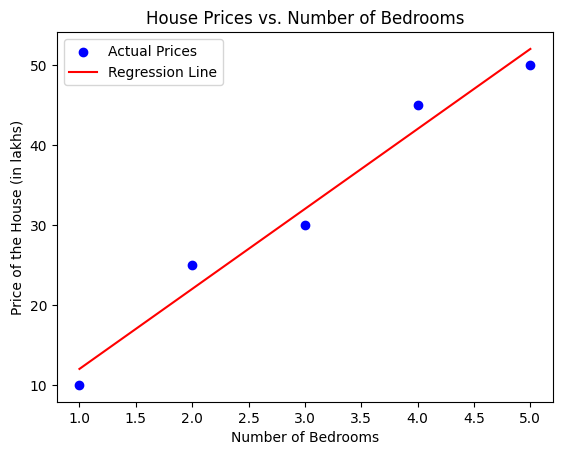

In [116]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Create the dataset
bedrooms = np.array([1, 2, 3, 4, 5]).reshape(-1, 1) # Independent variable (number of bedrooms)
prices = np.array([10, 25, 30, 45, 50]) # Dependent variable (price in lakhs)

# Fit the linear regression model
model = LinearRegression()
model.fit(bedrooms, prices)

predicted_prices = model.predict(bedrooms)

# Plot the data points and regression line
plt.scatter(bedrooms, prices, color='blue', label='Actual Prices')
plt.plot(bedrooms, predicted_prices, color='red', label='Regression Line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price of the House (in lakhs)')
plt.title('House Prices vs. Number of Bedrooms')
plt.legend()
plt.show()

---

## **Manual Calculation**
### **3. Manual Calculation of Slope and Intercept**
Steps to calculate slope (b1) and intercept (b0) without using a library

#### **Steps**
1. **Prepare the Dataset**
2. **Calculate Means**
3. **Compute Slope and Intercept**

#### **Code Implementation**

In [117]:
# Creating the dataset
X = np.array([1, 2, 3, 4, 5])
Y = np.array([10, 25, 30, 45, 50])

# Calculate the means of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Calculate the slope (b1) and intercept (b0)
numerator = sum((X - mean_x) * (Y - mean_y))
denominator = sum((X - mean_x) ** 2)
b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

print(f"Slope (b1): {b1}")
print(f"Intercept (b0): {b0}")

# Predict Y values using the equation Y_pred = b1 * X + b0
Y_pred = b1 * X + b0

Slope (b1): 10.0
Intercept (b0): 2.0


**The resulting plot shows the data points and the manually calculated regression line fitting through the data.**

---

### **2. Implementation of Linear Regression using 'sklearn'**
- **Overview**
  - We'll demonstrate how to implement Linear Regression using the **sklearn** library, specifically predicting temperature based on salinity using the **bottle.csv** dataset.
- **Dataset Preparation**
  - Please make sure you have the **bottle.csv** file in the working directory or provide the correct path.
- **Steps**
#### 1. **Import the necessary libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### 2. **Load the Dataset**
- **You can download the bottle.csv dataset file from the Google Drive link and use it in the same directory where your .ipynb code file is located. Here is the link: [Download bottle.csv](https://drive.google.com/file/d/1N6IAiLjZ68HuQOcFQZhLPyuwU-6psLEX/view?usp=sharing).**

In [7]:
df = pd.read_csv('./Dataset_File&img/bottle.csv')

# Handling encoding issues
try:
    df = pd.read_csv('./Dataset_File&img/bottle.csv', encoding='cp1252', low_memory=False)

except UnicodeDecodeError:
    print("UnicodeDecodeError encountered. Trying alternative encodings...")
    try:
        df = pd.read_csv('./Dataset_File&img/bottle.csv', encoding='iso-8859-1')
    except UnicodeDecodeError:
        df = pd.read_csv('./Dataset_File&img/bottle.csv', encoding='latin1')

# Data Preparation
df_binary = df[['Salnty', 'T_degC']].rename(columns={'Salnty': 'Sal', 'T_degC': 'Temp'})

C:\Users\ANKIT DIMRI\AppData\Local\Temp\ipykernel_4548\4156647574.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Dataset_File&img/bottle.csv')


#### **Scatter plot to understand data distribution**

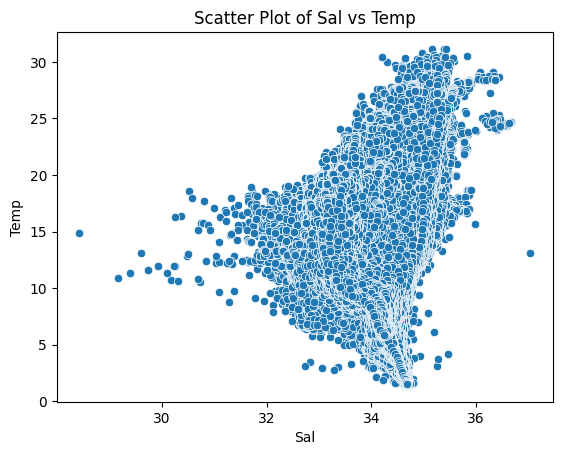

In [47]:
sns.scatterplot(x="Sal", y="Temp", data=df_binary)
plt.title('Scatter Plot of Sal vs Temp')
plt.show()

##### **Plot with linear fit**

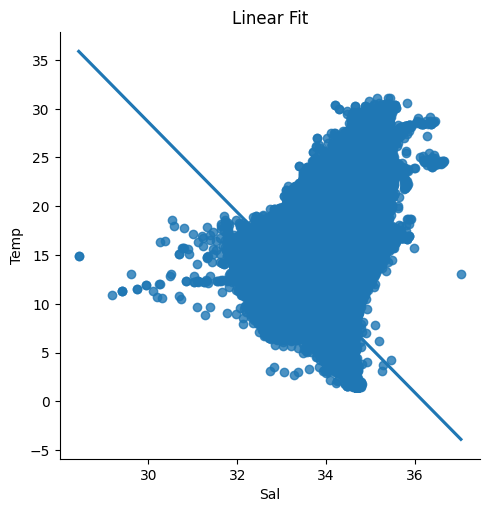

In [48]:
# Check Data Relationship
# Plot with linear fit
sns.lmplot(x="Sal", y="Temp", data=df_binary, order=1, ci=None)
plt.title('Linear Fit')
plt.show()

##### **Plot with quadratic fit**

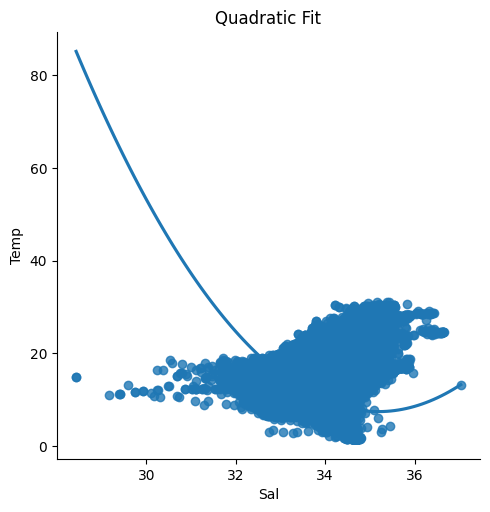

In [49]:
sns.lmplot(x="Sal", y="Temp", data=df_binary, order=2, ci=None)  # ci --> percentile limit 
plt.title('Quadratic Fit')
plt.show()

##### **Plot with cubic fit**

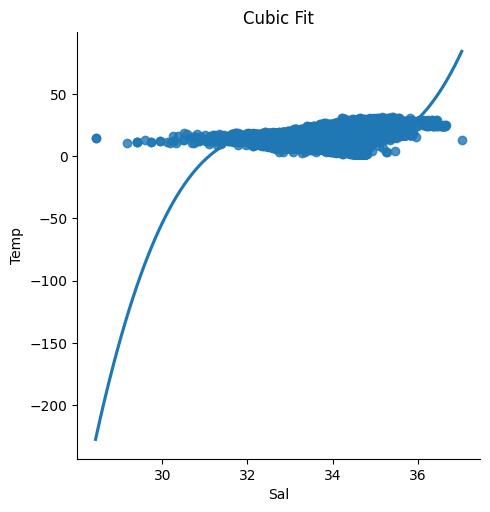

In [50]:
sns.lmplot(x="Sal", y="Temp", data=df_binary, order=3, ci=None)
plt.title('Cubic Fit')
plt.show()

#### 3. **Handling Missing Values**

In [51]:
# df_binary.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values
# df_binary.ffill(inplace=True)
df_binary = df_binary.ffill()

#### 4. **Splitting the Dataset**

In [52]:
X = df_binary['Sal'].values.reshape(-1, 1)
Y = df_binary['Temp'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

####   5. **Fitting the Linear Regression Model**

In [53]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

#### 6. **Making Predictions**

In [54]:
Y_pred = reg.predict(X_test)

#### 7. **Visualizing the Results**

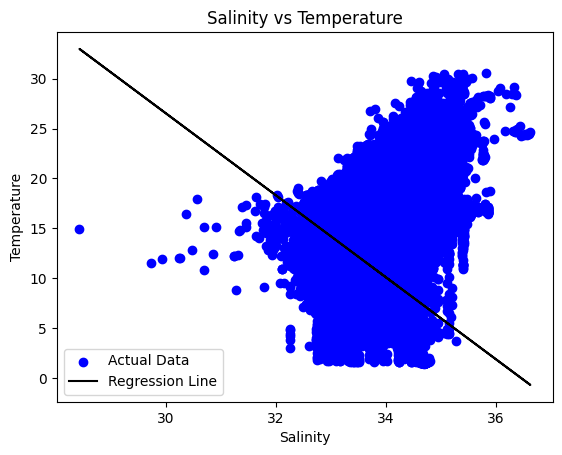

In [55]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Data')
plt.plot(X_test, Y_pred, color='black', label='Regression Line')
plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.legend()
plt.show()

---

### **3. Implementation-of-linear-regression-without-using-scikit-learn**

- **Overview**
  - To better understand the linear regression algorithm, we can implement it from scratch without using libraries like **sklearn**.

- #### **Practical Implementation**
  - **Steps**
    1. Define a **LinearRegression** class.
    2. Implement the **fit** method to calculate the slope and intercept.
    3. Implement the **predict** method to make predictions using the linear model.
    4. Load a dataset (e.g., **salary_data.csv**).
    5. Split the dataset into training and testing sets.
    6. Fit the linear regression model using the custom implementation.
    7. Make predictions and visualize the results.

### **Code Implementation**
1. **Define the LinearRegression Class**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class LinearRegression:
    def __init__(self):
        self.bias = None
        self.weight = None

    def fit(self, x, y):
        x_mean = x.mean()
        y_mean = y.mean()

        num = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(len(x)))
        den = sum((x[i] - x_mean) ** 2 for i in range(len(x)))

        self.weight = num / den
        self.bias = y_mean - (self.weight * x_mean)

    def predict(self, x):
        return self.bias + (self.weight * x)

2. **Load and Preprocess the Dataset**

In [57]:
df = pd.read_csv('./Dataset_File&img/salary_data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [63]:
# Extract features and target variable
x = df['YearsExperience'].values
y = df['Salary'].values

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)


# Making predictions
y_pred = model.predict(x_test)
print(f'Predicted values: {y_pred}')

Predicted values: [ 36400.05238313  91796.5137198   38246.60109435 113955.09825447
  71484.47789635 121341.29309936  67791.38047391  40093.14980557
 106568.90340958]


3. **Fit the Model and Make Predictions**

In [64]:
# Creating and fitting the model
model = LinearRegression()
model.fit(x_train, y_train)

In [65]:
print(f'Weight: {model.weight}')
print(f'Bias: {model.bias}')

Weight: 9551.343565171821
Bias: 25013.073145167327


4. **Visualize the Results**

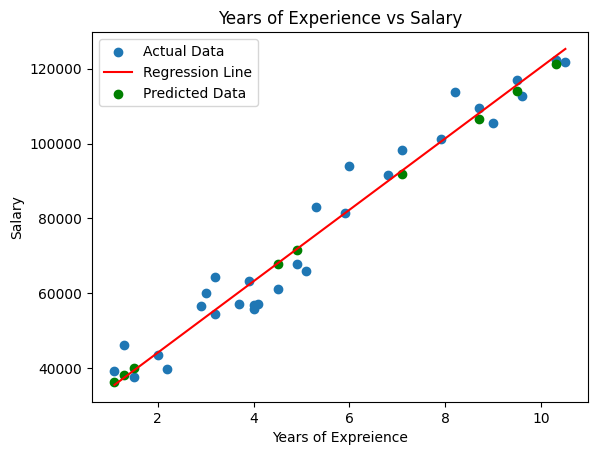

In [66]:
plt.title('Years of Experience vs Salary')
plt.scatter(x,y,label='Actual Data')
plt.plot(x,model.bias + model.weight*x, '-r', label='Regression Line')

# Plot predictions for the test data
plt.scatter(x_test, y_pred, color='green', label='Predicted Data')
plt.xlabel('Years of Expreience')
plt.ylabel('Salary')
plt.legend()
plt.show()

---

## **4. Model Evaluation**

### **Evaluation Metrics**
To assess the performance of our Linear Regression model, we use metrics such as

- **Mean Squared Error (MSE)** Measures the average squared difference between actual and predicted values.
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2
  $$
- **R-squared (R²)** Indicates how well the independent variables explain the variance of the dependent variable.
  $$
  R^2 = 1 - \frac{\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}
  $$

#### **Code for Evaluation Metrics**

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21678194.88955661
R-squared: 0.9792457179313453


- **Mean Squared Error (MSE)** **21,678,194.89** suggests the average squared difference between the actual and predicted values is quite high. The magnitude of MSE depends on the scale of the target variable. If your target values are large, this number might be acceptable.
- **R-squared (R²)** **0.979** is very high, indicating that approximately 97.9% of the variance in the dependent variable is explained by the model. This suggests a strong fit of the model to the data.

In summary, R² value indicates a very good model fit.



<div align="center">
    Created by Ankit Dimri  
    © 2024
</div>

